# Python basics

This notebook is aimed to people who know nothing of python. It goes through very basic concepts.

## Install Anaconda

First of all you need to have a working installation of python. If you don't already have it, you may want to install Anaconda. Just follow the steps given here: https://docs.anaconda.com/anaconda/install/mac-os/.

If unsure you can verify that Anaconda is installed by typing in a terminal (https://docs.anaconda.com/anaconda/install/verify-install/):
```bash
conda list
```
If a list of installed packages is displayed you're good to go :)

## use python with a text editor

As any programming language a good old text editor is enough to use python. This is the most classic way to run a sequence of instructions (i.e. a program).

1. Open a text editor and write `print(hello)`
2. Save your file as `test.py` and close the editor.
3. Open a terminal and go to the folder where `test.py` has been saved and type (in the terminal): `python test.py`

It should print `hello` in the terminal.

## open a jupyter notebook

Using a text editor is enough do anything but jupyter notebooks are an easier way to use python code for data analysis.

As anaconda is installed, you can install jupyter with the following command (typed in a terminal):

```bash
conda install -c conda-forge jupyterlab
```

You can then launch Jupyter with the command:

```bash
jupyter lab
```

It will open a new page in your default web browser (yes it interfaces with a web browser).

In the first line of the notebook type:

In [1]:
print('hello jupyter') # press SHIFT + ENTER when you're finished to run the command

hello jupyter


## handling arrays with numpy

In [2]:
import numpy as np # import numpy module (for array handling) and reference is as np

In [3]:
a = np.arange(25) # create an indexed array of 25 cells and associate it to a variable called `a`
print(a) # print the array

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [4]:
print(a / 2.) # print a/2

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12. ]


In [5]:
# now you can try these and see what happens
print(np.ones(5))
print(np.zeros(5))
print(np.linspace(-1,1,5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[-1.  -0.5  0.   0.5  1. ]


In [6]:
x = np.linspace(-1,1,5)
print(x[3]) # return the value in the fourth cell
print(x[1:3]) # return a slice of the array
print(np.exp(x)) # print the exponential of the vector called 'x'

0.5
[-0.5  0. ]
[0.36787944 0.60653066 1.         1.64872127 2.71828183]


In [7]:
print(np.exp(x) > 1) # a condition on an array produces a boolean array

[False False False  True  True]


In [8]:
print(x[np.exp(x) > 1]) # return the values of x where the condition on exp(x) is fulfilled

[0.5 1. ]


In [9]:
x = np.arange(5) * 2
y = np.arange(5)
print(x)
print(y)
print(x * y) # matrix operation each cell of x is multiplied by its corresponding cell in y

[0 2 4 6 8]
[0 1 2 3 4]
[ 0  2  8 18 32]


## functions

In [10]:
def square(x):
    return x**2

print(square(np.arange(5)))

[ 0  1  4  9 16]


In [12]:
def detect(x):
    """detect signal over 4 sigmas. Return the value of the detected signal and its index"""
    x_mean = np.mean(x)
    x_std = np.std(x)
    print('mean: ', x_mean)
    print('std: ', x_std)
    th = x_mean + 4*x_std
    print('threshold: ', th)
    return x[x > th], np.arange(x.size)[x>th]

# create a random normal distribution of values of std 1 with one channel larger than 5
a = np.random.standard_normal(size=100)
a[50] = 6
print(detect(a))

('mean: ', 0.15111734952232062)
('std: ', 1.2855154262107)
('threshold: ', 5.293179054365121)
(array([6.]), array([50]))


## plot a function

In [13]:
import pylab as pl # pylab is a high-level interface to matplotlib https://matplotlib.org/

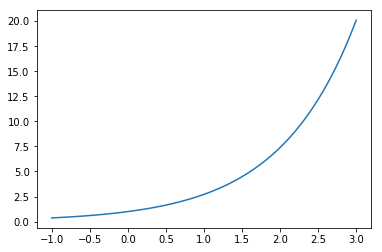

In [18]:
x = np.linspace(-1,3,100)
y = np.exp(x)
pl.plot(x,y)

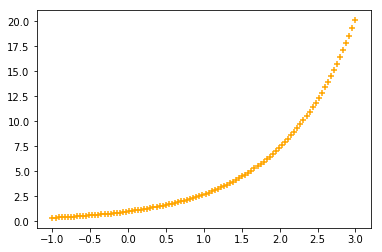

In [25]:
pl.scatter(x, y, marker='+', c='orange')

## fit a gaussian

### define a model

In [22]:
def gaussian(x, h, a, dx, w):
    return h + a * np.exp(-(x - dx)**2 / (2 * w**2))

### simulate data

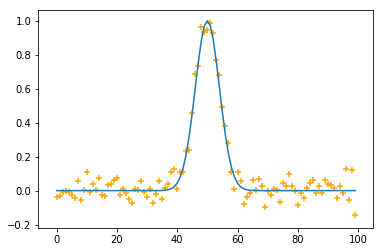

In [29]:

X = np.arange(100)
real = gaussian(X, 0., 1., 50., 4.)
pl.plot(X, real)
noised = real + np.random.standard_normal(real.size) * 0.05 # noise is added to the real data
pl.scatter(X, noised, marker='+', c='orange')

### fit data

In [31]:
import scipy.optimize

('estimated parameters of the model', array([4.22786399e-03, 1.00566496e+00, 5.01106013e+01, 4.07177363e+00]))
('estimated uncertainty on the parameters of the model', array([0.00594966, 0.02437488, 0.11224686, 0.11730274]))


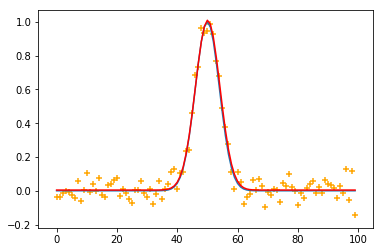

In [38]:
# scipy.optimize.curve_fit() returns the best fit parameters and the covariance matrix
p, cov = scipy.optimize.curve_fit(gaussian, X, noised, p0=(0,5,45,1)) # p0 is the initial guess
print('estimated parameters of the model', p)
# covariance matrix can be used to compute error on the estimated parameters as long as they are independant
print('estimated uncertainty on the parameters of the model', np.sqrt(np.diag(cov)))
pl.plot(X, real, label='real data')
pl.scatter(X, noised, marker='+', c='orange', label='data + noise')
pl.plot(X, gaussian(X, *p), label='fit', c='red')